# Variational Autoecoder

In [1]:
%matplotlib inline
import json

import numpy as np
import matplotlib.pyplot as plt
from torch.optim import Adam
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from callbacks import PlotCallback
from loss import loss_criterion
from model import VAE
from train import Trainer
from utils import load_model, save_model
from config import *

Let's set training and model parameters

In [2]:
# Training params
batch_size = 64
lr = 0.001
device = "cuda"

# Model params
input_size = 784
hidden_size = 512
latent_size = 10

Load data set and create data loader

In [3]:
# Load data set
dataset = MNIST(DATA_DIR, transform=ToTensor(), download=True)

# Create data loader
data_loader = DataLoader(dataset=dataset, batch_size=batch_size)

Initialize model and optimizer

In [4]:
# Initialize model
model = VAE(input_size, hidden_size, latent_size)

# Initialize optimizer
optimizer = Adam(model.parameters(), lr=lr)

Now that we have our dataset, model and optimizer ready, only that's left is to initialize it in `Trainer` and run training.

In [5]:
# Initialize trainer
trainer = Trainer(model=model,
                  data_loader=data_loader,
                  optimizer=optimizer,
                  device=device)

Run training for number of epochs.

In [ ]:
losses = trainer.run_train_loop(epochs=50)

Plot losses during training

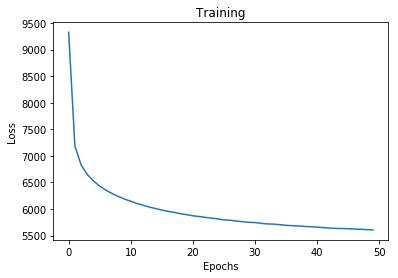

In [7]:
plt.plot(np.arange(len(losses)), losses)
plt.title("Training")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Even though it's used as a callback to plot samples during training, it can be used to generate samples aside from the train loop.

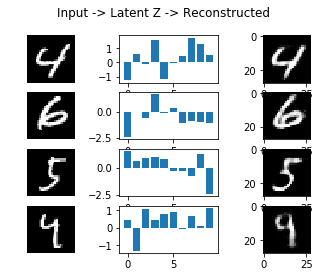

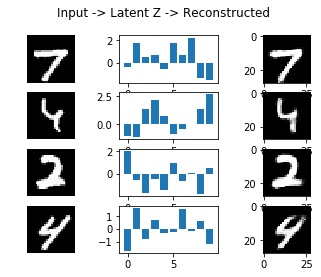

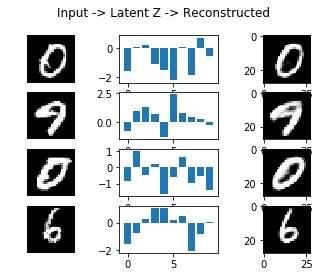

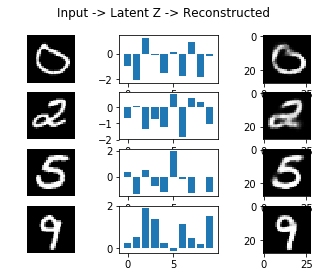

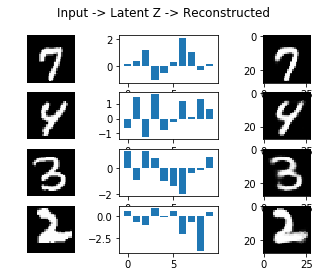

In [9]:
plot_cb = PlotCallback()
for _ in range(5):
    plot_cb(trainer)